In [1]:
# Import necessary libraries
import pandas as pd                   # For data manipulation and analysis
import datetime as dt                 # For datetime operations
from datetime import date             # Import the date object from datetime module
import matplotlib.pyplot as plt       # For plotting data
import yfinance as yf                 # For fetching financial data
import numpy as np                    # For numerical operations
import tensorflow as tf               # For building and training neural networks

In [2]:
# Define start date for fetching financial data
start_date_str = '2007-06-29'

# Define end date as today's date
end_date_str = date.today().strftime("%Y-%m-%d")

In [3]:
def import_data(ticker):
    """
    Fetches historical financial data for a given stock ticker using Yahoo Finance API.

    Parameters:
    ticker (str): Stock ticker symbol (e.g., 'AAPL' for Apple Inc.).

    Returns:
    pandas.DataFrame: DataFrame containing historical stock data.
    """
    # Download historical data for the specified ticker and date range
    data = yf.download(ticker, start=start_date_str, end=end_date_str)
    
    # Reset index to make 'Date' a column instead of index
    data.reset_index(inplace=True)
    
    return data

In [4]:
# Call import_data function to fetch historical financial data for 'AAPL' (Apple Inc.)
df_with_dates = import_data('AAPL')
df = import_data('AAPL')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
#Drop the Date column
df = df.drop(['Date'], axis = 1)

In [6]:
# Display the first 20 rows of the DataFrame df (historical financial data for 'AAPL')
df.head(20)

,Open,High,Low,Close,Adj Close,Volume
0,4.356071,4.428571,4.324643,4.358571,3.684966,1137841600
1,4.323214,4.360357,4.260714,4.330714,3.661413,994862400
2,4.357143,4.550000,4.339286,4.541786,3.839866,1162481600
3,4.600000,4.748929,4.596071,4.741071,4.008350,1453051600
4,4.754643,4.762143,4.657143,4.725000,3.994763,874694800
5,4.727857,4.746429,4.613571,4.654643,3.935282,995820000
6,4.602857,4.803571,4.600357,4.726786,3.996275,1255007600
7,4.716786,4.775000,4.689643,4.728214,3.997483,821772000
8,4.780357,4.794286,4.728214,4.788214,4.048208,704608800
9,4.822500,4.923214,4.804286,4.918929,4.158721,907606000


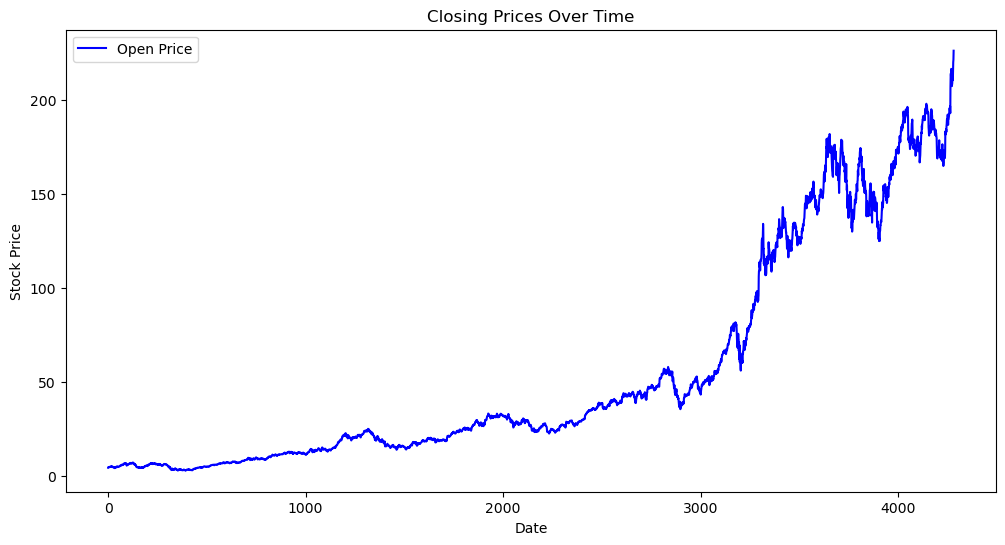

In [7]:
# Plotting open prices over time
plt.figure(figsize=(12, 6))
plt.plot(df.Close, color='blue', label='Open Price')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [8]:
# Create training DataFrame containing 80% of df
train = pd.DataFrame(df[0:int(len(df)*0.80)])

# Create test DataFrame containing the last 20% of df
test = pd.DataFrame(df[int(len(df)*0.80): int(len(df))])

In [9]:
# Display the shape (rows, columns) of the training DataFrame
train.shape

(3426, 6)

In [10]:
# Display the shape (rows, columns) of the test DataFrame
test.shape

(857, 6)

In [11]:
# Display the first 20 rows of the training DataFrame (train)
train.head(20)

,Open,High,Low,Close,Adj Close,Volume
0,4.356071,4.428571,4.324643,4.358571,3.684966,1137841600
1,4.323214,4.360357,4.260714,4.330714,3.661413,994862400
2,4.357143,4.550000,4.339286,4.541786,3.839866,1162481600
3,4.600000,4.748929,4.596071,4.741071,4.008350,1453051600
4,4.754643,4.762143,4.657143,4.725000,3.994763,874694800
5,4.727857,4.746429,4.613571,4.654643,3.935282,995820000
6,4.602857,4.803571,4.600357,4.726786,3.996275,1255007600
7,4.716786,4.775000,4.689643,4.728214,3.997483,821772000
8,4.780357,4.794286,4.728214,4.788214,4.048208,704608800
9,4.822500,4.923214,4.804286,4.918929,4.158721,907606000


In [12]:
# Display the first 20 rows of the test DataFrame
test.head(20)

,Open,High,Low,Close,Adj Close,Volume
3426,136.029999,136.960007,134.919998,136.910004,134.381058,71297200
3427,136.619995,137.880005,135.850006,136.009995,133.497681,76774200
3428,136.479996,136.990005,134.399994,135.389999,132.889114,73046600
3429,135.899994,136.389999,133.770004,135.130005,132.633926,64280000
3430,134.350006,135.529999,133.690002,135.369995,132.869507,60145100
3431,135.490005,136.009995,132.789993,133.190002,130.729752,80576300
3432,131.250000,132.220001,129.470001,130.839996,128.423172,97918500
3433,129.199997,130.000000,127.410004,129.710007,127.314034,96856700
3434,130.240005,130.710007,128.800003,129.869995,127.471085,87668800
3435,128.009995,129.720001,125.599998,126.000000,123.672577,103916400


In [13]:
# Import MinMaxScaler for feature scaling
from sklearn.preprocessing import MinMaxScaler

In [14]:
# Instantiate MinMaxScaler with feature range from 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))

In [15]:
# Extract 'Open' column from training DataFrame as a numpy array
train_close = train.iloc[:, 4:5].values

# Extract 'Open' column from test DataFrame as a numpy array
test_close = test.iloc[:, 4:5].values

In [16]:
# Scale the 'Open' prices from the training data using MinMaxScaler
training_array = scaler.fit_transform(train_close)

In [17]:
# Scaled 'Open' prices from the training data
training_array

array([[0.00959615],
       [0.00942541],
       [0.01071906],
       ...,
       [0.93449388],
       [0.95900533],
       [0.95598133]])

In [18]:
# Initialize lists to store input sequences (x_train) and corresponding labels (y_train)
x_train = []
y_train = []

In [19]:
# Generate sequences of 100 historical prices as inputs (x_train) and the next price as labels (y_train)
for i in range(100, training_array.shape[0]):
    x_train.append(training_array[i-100:i])  # Append sequence of 100 prices
    y_train.append(training_array[i, 0])     # Append next price as label

In [20]:
# Convert lists to numpy arrays for model training
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
# Display the shape (number of sequences, sequence length, number of features) of x_train
x_train.shape

(3326, 100, 1)

In [22]:
# Importing necessary layers, model and Adam optimizer from TensorFlow Keras
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [23]:
# Initialize sequential model
model = Sequential()

# Add LSTM layer with 100 units, ReLU activation, and return sequences (for stacking LSTM layers),
# input shape is (sequence length, number of features)
model.add(LSTM(units=100, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

# Add LSTM layer with 120 units and ReLU activation, return sequences for stacking
model.add(LSTM(units=120, activation='relu', return_sequences=True))
model.add(Dropout(0.3))  # Dropout layer

# Add LSTM layer with 150 units and ReLU activation, return sequences for stacking
model.add(LSTM(units=150, activation='relu', return_sequences=True))
model.add(Dropout(0.4))  # Dropout layer

# Add LSTM layer with 180 units and ReLU activation (final layer before dense layer)
model.add(LSTM(units=180, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer

# Add Dense layer with 1 unit (output layer)
model.add(Dense(units=1))

C:\Users\uzair\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
# Display a summary of the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 100)            │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 120)            │         106,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 120)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 150)            │         162,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 150)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 180)                 │         238,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 180)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             181 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 547,981 (2.09 MB)

 Trainable params: 547,981 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Compile the model with Adam optimizer, mean squared error loss function, and mean absolute error metric
optimizer = Adam(learning_rate=0.001)  # Define Adam optimizer with learning rate 0.001
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['MAE'])

# Train the model on the training data (x_train, y_train) for 100 epochs
model.fit(x_train, y_train, epochs=100)  # Fit the model with 100 epochs

Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 35s 259ms/step - MAE: 0.0822 - loss: 0.0204
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 24s 232ms/step - MAE: 0.0266 - loss: 0.0019
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 27s 259ms/step - MAE: 0.0277 - loss: 0.0020
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 24s 226ms/step - MAE: 0.0284 - loss: 0.0020
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 23s 223ms/step - MAE: 0.0263 - loss: 0.0016
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 22s 213ms/step - MAE: 0.0258 - loss: 0.0016
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 22s 211ms/step - MAE: 0.0216 - loss: 0.0014
Epoch 8/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 21s 199ms/step - MAE: 0.0214 - loss: 0.0012
Epoch 9/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 194ms/step - MAE: 0.0236 - loss: 0.0015
Epoch 10/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - MAE: 0.0238 - loss: 0.0016
Epoch 11/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 190ms/step - MAE: 0.0211 - loss: 0.0014
Epoch 12/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 182ms/step - MAE:

104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - MAE: 0.0175 - loss: 7.0916e-04
Epoch 69/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 193ms/step - MAE: 0.0176 - loss: 7.5140e-04
Epoch 70/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 22s 206ms/step - MAE: 0.0178 - loss: 7.6354e-04
Epoch 71/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 21s 202ms/step - MAE: 0.0181 - loss: 8.2153e-04
Epoch 72/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 194ms/step - MAE: 0.0175 - loss: 7.0636e-04
Epoch 73/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 21s 201ms/step - MAE: 0.0177 - loss: 7.9705e-04
Epoch 74/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 21s 204ms/step - MAE: 0.0185 - loss: 9.3450e-04
Epoch 75/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 21s 199ms/step - MAE: 0.0175 - loss: 7.5543e-04
Epoch 76/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 21s 197ms/step - MAE: 0.0184 - loss: 8.3366e-04
Epoch 77/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 21s 200ms/step - MAE: 0.0184 - loss: 8.8603e-04
Epoch 78/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 21s 200ms/step - MAE: 0.0176 - loss: 7.5075e-04
Epoch 79/100
104/104 ━━

In [26]:
# Save the trained model to a file with .keras extension
model.save('my_model.keras')

In [27]:
# Display the shape (rows, columns) of the test_open array
test_close.shape

(857, 1)

In [28]:
# Display the contents of the test_open array
test_close

array([[134.38105774],
       [133.49768066],
       [132.88911438],
       [132.63392639],
       [132.86950684],
       [130.72975159],
       [128.423172  ],
       [127.31403351],
       [127.47108459],
       [123.6725769 ],
       [123.53515625],
       [123.03459167],
       [118.75513458],
       [119.02012634],
       [125.42952728],
       [122.80883026],
       [119.80535126],
       [117.91101074],
       [119.1771698 ],
       [114.21067047],
       [118.85327148],
       [117.76380157],
       [119.70721436],
       [118.79438782],
       [121.69971466],
       [123.25053406],
       [122.45549011],
       [118.30363464],
       [117.77359772],
       [121.11079407],
       [120.27649689],
       [117.87174225],
       [118.36251831],
       [118.97106171],
       [119.14774323],
       [117.68527222],
       [119.89369965],
       [120.7279892 ],
       [123.57444   ],
       [123.87870789],
       [125.53749847],
       [127.952034  ],
       [130.54330444],
       [128

In [29]:
# Create a DataFrame containing the last 10 days of 'Open' prices from the training data
past_100_days = pd.DataFrame(train_close[-100:])

In [30]:
# Create a DataFrame containing the 'Open' prices from the test data
test_df = pd.DataFrame(test_close)

In [31]:
# Concatenate past_10_days and test_df DataFrames into final_df, ignoring original indices
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [32]:
# Display the first 20 rows of the final_df DataFrame
final_df.head(20)

,0
0,113.041573
1,109.705299
2,107.953995
3,104.529694
4,107.699631
5,109.392212
6,104.803627
7,105.879852
8,109.852058
9,112.474106


In [33]:
# Scale the input data in final_df using MinMaxScaler
input_data = scaler.fit_transform(final_df)

In [34]:
# Display the contents of the input_data array
input_data

array([[0.06987815],
       [0.04248906],
       [0.02811175],
       [0.        ],
       [0.02602356],
       [0.03991878],
       [0.00224885],
       [0.01108411],
       [0.04369388],
       [0.06521954],
       [0.05823185],
       [0.07204671],
       [0.0799181 ],
       [0.04963754],
       [0.0775887 ],
       [0.050762  ],
       [0.06618341],
       [0.06529984],
       [0.08136374],
       [0.14104123],
       [0.11453584],
       [0.11525863],
       [0.11140329],
       [0.09782925],
       [0.07341206],
       [0.08570104],
       [0.08056066],
       [0.07156475],
       [0.0658621 ],
       [0.06594239],
       [0.07839197],
       [0.03501928],
       [0.06811108],
       [0.01622456],
       [0.01550158],
       [0.02891496],
       [0.06513925],
       [0.09790967],
       [0.09682342],
       [0.07775506],
       [0.07493881],
       [0.10326019],
       [0.10100733],
       [0.10140956],
       [0.1097772 ],
       [0.10245554],
       [0.09151311],
       [0.096

In [35]:
# Display the shape (rows, columns) of the input_data array
input_data.shape

(957, 1)

In [36]:
# Initialize lists to store input sequences (x_test) and corresponding labels (y_test) for testing
x_test = []
y_test = []

In [37]:
# Generate sequences of 100 data points as inputs (x_test) and the next point as labels (y_test) for testing
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])  # Append sequence of 100 data points
    y_test.append(input_data[i, 0])     # Append next data point as label


In [38]:
# Convert x_test and y_test lists into numpy arrays for testing
x_test, y_test = np.array(x_test), np.array(y_test)

In [39]:
# Display the shape (number of sequences, sequence length, number of features) of x_test
x_test.shape

(857, 100, 1)

In [40]:
# Display the shape (number of sequences) of y_test
y_test.shape

(857,)

In [41]:
# Predict output values (y_pred) using the trained model on the input sequences (x_test)
y_pred = model.predict(x_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step


In [42]:
# Display the shape (number of samples, number of outputs) of y_pred
y_pred.shape

(857, 1)

In [43]:
# Display the actual labels (y_test) for the test data
y_test

array([0.24506436, 0.23781229, 0.23281627, 0.23072131, 0.23265531,
       0.21508901, 0.19615318, 0.18704772, 0.18833703, 0.15715324,
       0.15602508, 0.15191571, 0.11678356, 0.11895901, 0.1715769 ,
       0.15006232, 0.1254053 , 0.10985374, 0.12024825, 0.07947585,
       0.11758922, 0.10864523, 0.12459965, 0.11710581, 0.14095705,
       0.15368848, 0.14716158, 0.11307698, 0.10872565, 0.13612232,
       0.12927316, 0.10953136, 0.11356038, 0.11855621, 0.12000668,
       0.10800054, 0.1261306 , 0.13297968, 0.15634758, 0.15884547,
       0.17246328, 0.19228538, 0.21355838, 0.19937642, 0.2250808 ,
       0.20574223, 0.225645  , 0.22290541, 0.22838433, 0.21444439,
       0.21758734, 0.20501694, 0.22419478, 0.22741777, 0.22475874,
       0.21823196, 0.21742599, 0.20114895, 0.20985161, 0.17206036,
       0.17407484, 0.18728986, 0.19285917, 0.16573871, 0.15815136,
       0.13280675, 0.1505642 , 0.17058146, 0.16105711, 0.14959539,
       0.14830414, 0.16945162, 0.15427698, 0.16775651, 0.16614

In [44]:
# Display the predicted values (y_pred) generated by the model for the test data
y_pred

array([[0.2711801 ],
       [0.27067208],
       [0.27057037],
       [0.27065125],
       [0.2706591 ],
       [0.2704754 ],
       [0.26978797],
       [0.26809022],
       [0.2647357 ],
       [0.25988093],
       [0.25369602],
       [0.24643333],
       [0.23859283],
       [0.23005038],
       [0.22192252],
       [0.21559593],
       [0.2110289 ],
       [0.20772144],
       [0.20508699],
       [0.2027814 ],
       [0.200342  ],
       [0.19778535],
       [0.1952085 ],
       [0.19289786],
       [0.19093658],
       [0.18953533],
       [0.1888746 ],
       [0.18892558],
       [0.18946305],
       [0.19021918],
       [0.19106692],
       [0.19186905],
       [0.19238503],
       [0.1924505 ],
       [0.1921126 ],
       [0.19150552],
       [0.19066738],
       [0.18980072],
       [0.1891215 ],
       [0.18889838],
       [0.18923095],
       [0.19020177],
       [0.19193342],
       [0.19442485],
       [0.19744451],
       [0.2008942 ],
       [0.20509316],
       [0.210

In [45]:
# Retrieve the scaling factors used by the MinMaxScaler
scaler.scale_

array([0.00820949])

In [46]:
# Scale y_pred and y_test back to their original values using scale_factor
scale_factor = 1/0.00820949
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

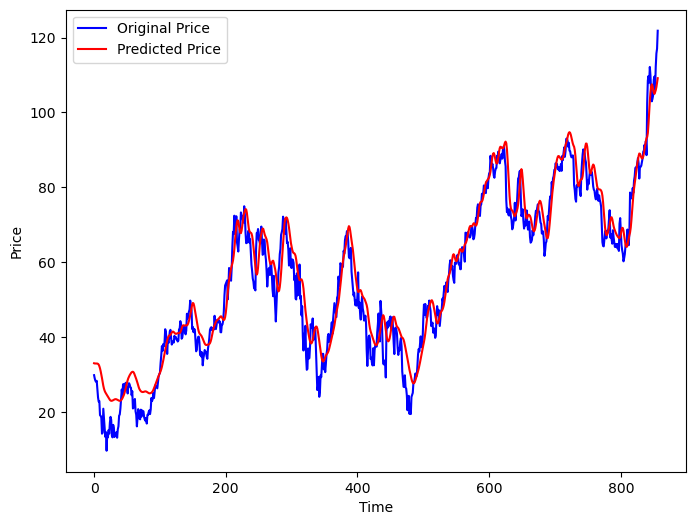

In [47]:
# Plot the original (y_test) and predicted (y_pred) prices over time
plt.figure(figsize = (8,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [48]:
# Assuming y_test and y_pred are already defined from your model predictions
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R2 score)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2 score):", r2)

Mean Absolute Error: 4.3078042541840755
Mean Squared Error: 30.293902287812017
Root Mean Squared Error: 5.503989670031369
R-squared (R2 score): 0.9376326168256701
